# Regularized Logistic Regression

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import minimize

In [4]:
columns = ['Microchip Test 1', 'Microchip Test 2', 'Result']
dataset = pd.read_csv('./ex2data2.txt', delimiter=',', header=None, names=columns)

In [5]:
dataset.head()

,Microchip Test 1,Microchip Test 2,Result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [8]:
print('# of negative examples: {} '.format(dataset[dataset['Result'] == 0].shape[0]))
print('# of positive examples: {} '.format(dataset[dataset['Result'] == 1].shape[0]))

# of negative examples: 60 
# of positive examples: 58 


In [ ]:
dataset.insert(0,'Intercept',1)

In [15]:
X = dataset.iloc[:,:3]
y = dataset.iloc[:,[-1]]

## Plot Data

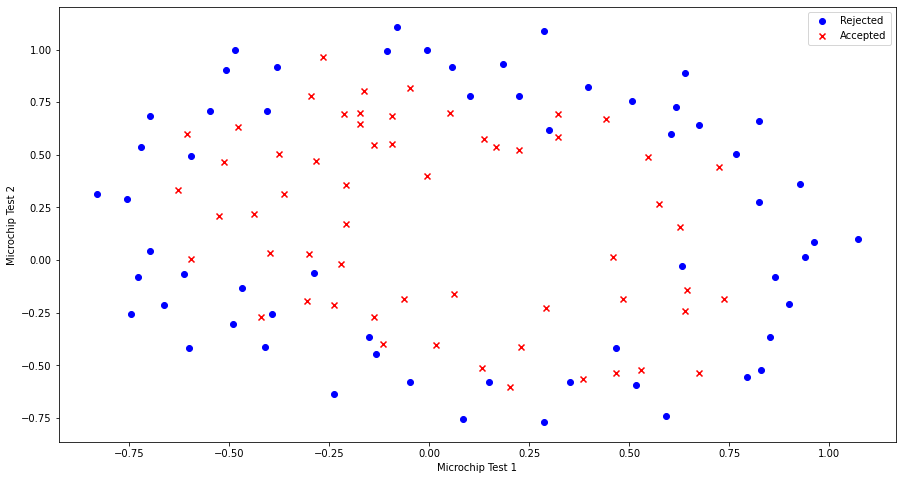

In [17]:
plt.figure(figsize=(15,8))

neg = X[y.Result == 0]
pos = X[y.Result == 1]

plt.scatter(neg.iloc[:,1].values,neg.iloc[:,2], c='b', marker='o', label='Rejected')
plt.scatter(pos.iloc[:,1].values,pos.iloc[:,2], c='r', marker='x', label='Accepted')
plt.legend()
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()

## Regularized Cost Function

$$ \large J(\theta) = - \frac{1}{m} \sum^{m-1}_{i=0} Loss_i$$
$$ \large Loss_i =\sum_{i = 0}^{m-1} \Big[y^{(i)} log(h_{\theta} (x^{(i)})) + (1-y^{(i)}) log(1-h_{\theta}(x^{(i)}))\Big] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

$$ \large J(\theta) = - \frac{1}{m} ((\log(g(X\theta)))^T y + (log(1-g(X\theta)))^T (1-y)) + \frac{\lambda}{2m} \theta_r^T \theta_r$$

In [18]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [19]:
def computeCostReg(theta, reg, X, y):
    m = X.shape[0]
    J = -( 1 / m)* (np.log(sigmoid(X.dot(theta))).T.dot(y) + np.log(1 - sigmoid(X.dot(theta))).T.dot(1-y)) + (reg/(2*m))*(theta[1:].T.dot(theta[1:]))
    if np.isnan(J[0]):
        return (np.inf)
    return (J[0])

In [32]:
def gradientReg(theta,reg,X,y):
    m = X.shape[0]
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    grad = (1/m)*X.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    return (grad.flatten())

In [37]:
t = np.zeros((X.shape[1],1))

case_0 = minimize(computeCostReg, t, args=(0,X.values,y.values), method='BFGS', jac = gradientReg)
case_1 = minimize(computeCostReg, t, args=(1,X.values,y.values), method='BFGS', jac = gradientReg)
case_100 = minimize(computeCostReg, t, args=(100,X.values,y.values), method='BFGS', jac = gradientReg)

In [38]:
case_0

      fun: 0.6902411220334614
 hess_inv: array([[ 4.23119059, -0.71794386, -2.70083516],
       [-0.71794386, 15.97425844,  1.71616486],
       [-2.70083516,  1.71616486, 13.67341412]])
      jac: array([-5.97641792e-07, -1.61871298e-07, -1.52054218e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 14
     njev: 15
   status: 0
  success: True
        x: array([-0.01418223, -0.30352647, -0.01815365])

In [39]:
case_1

      fun: 0.6905833534588792
 hess_inv: array([[ 4.04021941, -0.85994568, -1.94976778],
       [-0.85994568, 13.97912714,  2.30399024],
       [-1.94976778,  2.30399024, 11.47080994]])
      jac: array([ 3.62620083e-06,  4.03001883e-06, -9.08940902e-06])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 13
     njev: 14
   status: 0
  success: True
        x: array([-0.01737139, -0.26537861, -0.01174645])

In [40]:
case_100

      fun: 0.6928178461959855
 hess_inv: array([[ 3.68180003, -0.08927933, -0.18462243],
       [-0.08927933,  1.09834318,  0.01706721],
       [-0.18462243,  0.01706721,  1.01347573]])
      jac: array([-3.1829019e-06, -1.0664071e-06,  7.9005183e-08])
  message: 'Optimization terminated successfully.'
     nfev: 7
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([-0.03307058, -0.02015469,  0.00141709])

In [67]:
def classify(theta,X,threshold = 0.5):
     p = sigmoid(X.dot(theta)) >= threshold
     return p.astype('int')

## Plot Decision Boundaries

In [61]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
XX = poly.fit_transform(X.iloc[:,1:3])
#XX = np.c_[np.ones((XX.shape[0],1)),XX]

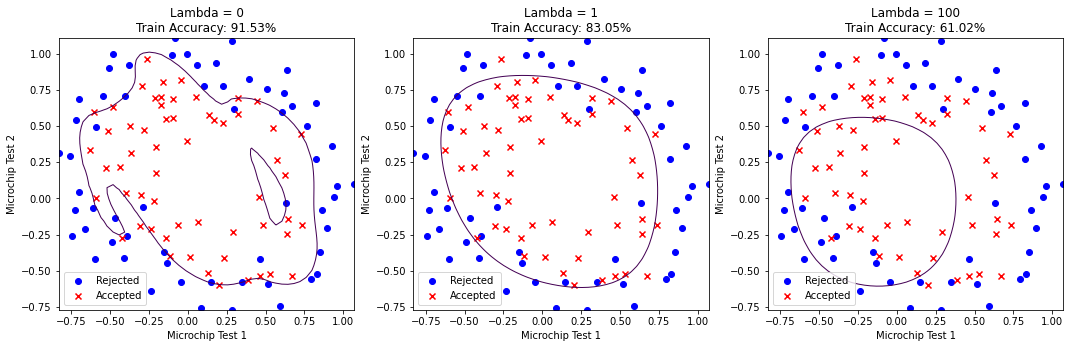

In [76]:
fig = plt.figure(figsize=(18,5))
for i, c in enumerate([0,1,100]):
    t = np.zeros((XX.shape[1],1))
    res = minimize(computeCostReg, t, args=(c,XX,y.values), method='BFGS', jac = gradientReg)
    theta_opt = res.x.reshape(-1,1)

    accuracy = (sum(classify(res.x,XX) == y.values.ravel())/y.shape[0])*100

    ax = fig.add_subplot(1,3,i+1)
    ax.scatter(neg.iloc[:,1].values,neg.iloc[:,2], c='b', marker='o', label='Rejected')
    ax.scatter(pos.iloc[:,1].values,pos.iloc[:,2], c='r', marker='x', label='Accepted')
    plt.legend()
    ax.set_xlabel(columns[0])
    ax.set_ylabel(columns[1])
    ax.set_title('Lambda = {}\nTrain Accuracy: {}%'.format(c,np.round(accuracy,decimals=2)))

    x1_min = X.iloc[:,1].min()
    x1_max = X.iloc[:,1].max()
    x2_min = X.iloc[:,2].min()
    x2_max = X.iloc[:,2].max()

    xx1,xx2 = np.meshgrid(np.linspace(x1_min,x1_max),np.linspace(x2_min,x2_max))

    h = poly.fit_transform(np.c_[xx1.ravel(),xx2.ravel()]).dot(theta_opt)

    ax.contour(xx1,xx2,h.reshape(xx1.shape),[0.005],linewidths=1)